simple linear regression equation
# y=mx+c

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [195]:
df=pd.read_csv("height-weight.csv")
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

In [196]:
df.describe()

Weight      Height
count   23.000000   23.000000
mean    73.826087  158.391304
std     17.872407   19.511626
min     45.000000  120.000000
25%     59.000000  142.500000
50%     78.000000  162.000000
75%     86.000000  175.000000
max    105.000000  183.000000

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [198]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

now we want to calculate y hat for which we need to calculate theta 0 and theta 1 
# Lets first do using OLS

Text(0, 0.5, 'Height')

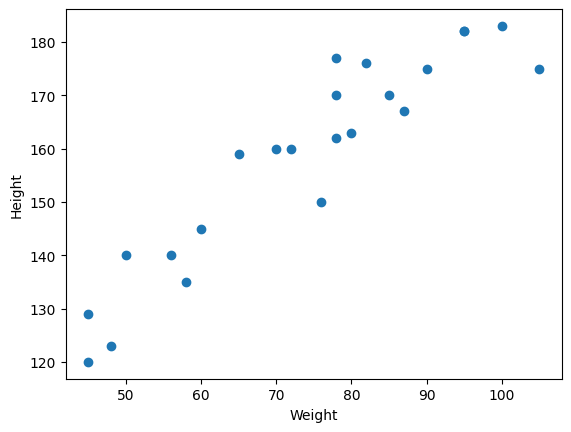

In [199]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [200]:
##correlation
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

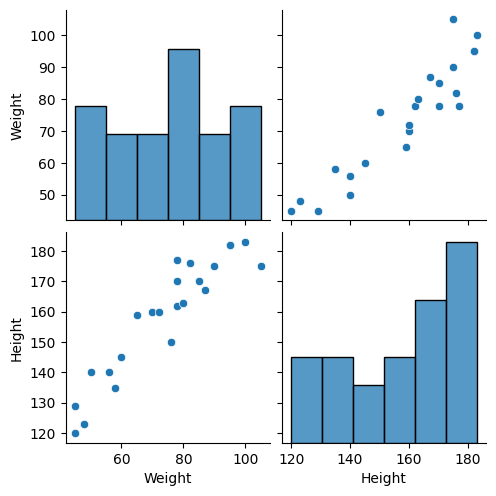

In [201]:
import seaborn as sns
sns.pairplot(df)

In [202]:
X=df[["Weight"]] #note independent values should always be in 2d
y=df[["Height"]] #output need not be 2d

In [203]:
print(X.shape)
print(y.shape)

(23, 1)
(23, 1)


In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [206]:
X_test

Weight
15      78
9       78
0       45
8       95
17      65
12     105

In [207]:
X_train

Weight
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [209]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
scaler1 = StandardScaler()
Y_train_test=scaler1.fit_transform(y_train)
Y_test_test=scaler1.transform(y_test)

In [210]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [211]:
reg.fit(X_train,y_train)

LinearRegression()

In [212]:
reg.coef_

array([[17.2982057]])

In [213]:
reg.intercept_

array([156.47058824])

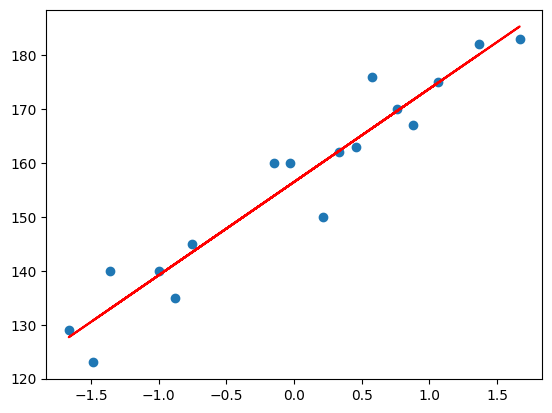

In [214]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train),color='r')

In [215]:
y_pred=reg.predict(X_test)
print(y_pred)

[[162.26499721]
 [162.26499721]
 [127.68347133]
 [180.07972266]
 [148.64197186]
 [190.55897293]]


In [216]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [217]:
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=(mse**0.5)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [218]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [219]:
## OLS Linear Regression
import statsmodels.api as sm

In [220]:
model=sm.OLS(Y_train_test,X_train).fit() #here why i used y_train_test instead of Y_train because if i give y_train its getting standardized in ols its not like sklearn

In [221]:
y_pred=model.predict(X_test)


In [222]:
print(model.summary())
#in model summary if you see coef is 0.956 this is for standardized data if you give Y_train you will get the same coefficient like the sklearn

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              186.1
Date:                Sat, 02 Aug 2025   Prob (F-statistic):                    3.14e-10
Time:                        11:34:30   Log-Likelihood:                         -2.5647
No. Observations:                  17   AIC:                                      7.129
Df Residuals:                      16   BIC:                                      7.963
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [223]:
reg.predict(scaler.transform([[64]]))

c:\Users\jyoth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[147.59404683]])

In [224]:
y_pred_std=model.predict(scaler.transform([[64]]))

y_pred_original = scaler1.inverse_transform(y_pred_std.reshape(-1, 1))
print(y_pred_original)

[[147.59404683]]


c:\Users\jyoth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
